<a href="https://www.kaggle.com/code/kiranpatil7022/seoul-bike-insights-and-predictions?scriptVersionId=147601870" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## **1. Loading libraries and data**

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/seoul-bike-trip-duration-prediction/For_modeling.csv


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

pd.set_option('display.max_columns',200)
np.random.seed(24)

In [3]:
df = pd.read_csv(
    "/kaggle/input/seoul-bike-trip-duration-prediction/For_modeling.csv",
    dtype={
        'Duration' : 'int8',
        'Distance' : 'int8',
        'PLong' : 'float32',
        'PLatd' : 'float32',
        'DLong' : 'float32',
        'DLatd' : 'float32',
        'Haversine' : 'float32',
        'Pmonth' : 'int8',
        'Pday' : 'int8',
        'Phour' : 'int8',
        'Pmin' : 'int8',
        'PDweek' : 'int8',
        'Dmonth' : 'int8',
        'Dday' : 'int8',
        'Dhour' : 'int8',
        'Dmin' : 'int8',
        'DDweek' : 'int8',
        'Temp' : 'float32',
        'Precip' : 'float32',
        'Wind' : 'float32',
        'Humid' : 'float32',
        'Solar' : 'float32',
        'Snow' : 'float32',
        'GroundTemp' : 'float32',
        'Dust' : 'float32'
    },
    index_col=0
).sample(frac=1)
df.head()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
6176536,19,-120,37.613956,127.030251,37.638706,127.015907,3.028153,9,13,3,54,3,9,13,4,15,3,20.900000,0.0,1.7,68.0,0.00,0.0,20.000000,27.0
8576807,16,-102,37.586388,126.935127,37.564541,126.927071,2.530896,11,5,13,45,0,11,5,14,2,0,16.799999,0.0,1.1,46.0,1.71,0.0,23.200001,58.0
8714908,5,-44,37.464550,126.883728,37.456841,126.888344,0.949100,11,10,8,50,5,11,10,8,56,5,9.300000,0.0,0.3,85.0,0.07,0.0,8.700000,83.0
4599459,6,-44,37.546307,127.049805,37.539654,127.052589,0.779438,8,1,12,17,2,8,1,12,23,2,36.799999,0.0,1.3,39.0,2.80,0.0,54.900002,37.0
4460101,59,-80,37.556610,126.898018,37.556610,126.898018,0.000000,7,27,21,17,4,7,27,22,16,4,30.299999,0.0,1.1,75.0,0.00,0.0,30.200001,28.0


In [4]:
df.shape

(9601139, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9601139 entries, 6176536 to 6452179
Data columns (total 25 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Duration    int8   
 1   Distance    int8   
 2   PLong       float32
 3   PLatd       float32
 4   DLong       float32
 5   DLatd       float32
 6   Haversine   float32
 7   Pmonth      int8   
 8   Pday        int8   
 9   Phour       int8   
 10  Pmin        int8   
 11  PDweek      int8   
 12  Dmonth      int8   
 13  Dday        int8   
 14  Dhour       int8   
 15  Dmin        int8   
 16  DDweek      int8   
 17  Temp        float32
 18  Precip      float32
 19  Wind        float32
 20  Humid       float32
 21  Solar       float32
 22  Snow        float32
 23  GroundTemp  float32
 24  Dust        float32
dtypes: float32(13), int8(12)
memory usage: 659.3 MB


## **2. Exploratory Data Analysis**

In [6]:
df.columns

Index(['Duration', 'Distance', 'PLong', 'PLatd', 'DLong', 'DLatd', 'Haversine',
       'Pmonth', 'Pday', 'Phour', 'Pmin', 'PDweek', 'Dmonth', 'Dday', 'Dhour',
       'Dmin', 'DDweek', 'Temp', 'Precip', 'Wind', 'Humid', 'Solar', 'Snow',
       'GroundTemp', 'Dust'],
      dtype='object')

In [7]:
df.describe()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
count,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06
mean,2.580294e+01,-9.069010e-01,3.754739e+01,1.269909e+02,3.754747e+01,1.269907e+02,1.870314e+00,7.578754e+00,1.576714e+01,1.437801e+01,2.914948e+01,2.943812e+00,7.579198e+00,1.576666e+01,1.442620e+01,2.999278e+01,2.945771e+00,1.856200e+01,1.784856e-02,1.819273e+00,5.397561e+01,7.300681e-01,9.948924e-03,2.072376e+01,3.245799e+01
std,2.504333e+01,7.404757e+01,4.441376e-02,8.257065e-02,4.445305e-02,8.323726e-02,1.995361e+00,2.696797e+00,8.748012e+00,6.249244e+00,1.725837e+01,1.976063e+00,2.696781e+00,8.747788e+00,6.484493e+00,1.730960e+01,1.977624e+00,9.498075e+00,3.736281e-01,9.710258e-01,1.742159e+01,9.175004e-01,1.628091e-01,1.265221e+01,2.407264e+01
min,1.000000e+00,-1.280000e+02,3.743727e+01,1.267986e+02,3.743727e+01,1.267986e+02,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.780000e+01,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,-1.360000e+01,0.000000e+00
25%,8.000000e+00,-6.600000e+01,3.751424e+01,1.269200e+02,3.751424e+01,1.269194e+02,6.758669e-01,6.000000e+00,8.000000e+00,1.000000e+01,1.400000e+01,1.000000e+00,6.000000e+00,8.000000e+00,1.000000e+01,1.500000e+01,1.000000e+00,1.220000e+01,0.000000e+00,1.100000e+00,4.100000e+01,0.000000e+00,0.000000e+00,1.160000e+01,1.600000e+01
50%,1.600000e+01,0.000000e+00,3.754693e+01,1.269943e+02,3.754655e+01,1.269947e+02,1.257498e+00,8.000000e+00,1.600000e+01,1.600000e+01,2.900000e+01,3.000000e+00,8.000000e+00,1.600000e+01,1.600000e+01,3.000000e+01,3.000000e+00,2.010000e+01,0.000000e+00,1.700000e+00,5.300000e+01,2.700000e-01,0.000000e+00,2.110000e+01,2.700000e+01
75%,3.600000e+01,6.400000e+01,3.757324e+01,1.270618e+02,3.757324e+01,1.270624e+02,2.363812e+00,1.000000e+01,2.300000e+01,1.900000e+01,4.400000e+01,5.000000e+00,1.000000e+01,2.300000e+01,2.000000e+01,4.500000e+01,5.000000e+00,2.550000e+01,0.000000e+00,2.400000e+00,6.700000e+01,1.260000e+00,0.000000e+00,2.850000e+01,4.200000e+01
max,1.190000e+02,1.260000e+02,3.768972e+01,1.271803e+02,3.768972e+01,1.271803e+02,2.863448e+01,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,6.000000e+00,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,6.000000e+00,3.940000e+01,3.500000e+01,7.400000e+00,9.800000e+01,3.520000e+00,8.800000e+00,6.220000e+01,3.040000e+02


**Observations:**
1. Distance: there are data points where the distance value is negatice (-ve)
2. Haversine: there are data points where the haversine value is 0. 

**Observation analysis 1. Distance**  
Exploring the data points where the distance is negative.

In [8]:
df.shape

(9601139, 25)

In [9]:
df[df['Distance']<0].shape

(4787174, 25)

In [10]:
df[df['Distance']<0].head()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
6176536,19,-120,37.613956,127.030251,37.638706,127.015907,3.028153,9,13,3,54,3,9,13,4,15,3,20.900000,0.0,1.7,68.0,0.00,0.0,20.000000,27.0
8576807,16,-102,37.586388,126.935127,37.564541,126.927071,2.530896,11,5,13,45,0,11,5,14,2,0,16.799999,0.0,1.1,46.0,1.71,0.0,23.200001,58.0
8714908,5,-44,37.464550,126.883728,37.456841,126.888344,0.949100,11,10,8,50,5,11,10,8,56,5,9.300000,0.0,0.3,85.0,0.07,0.0,8.700000,83.0
4599459,6,-44,37.546307,127.049805,37.539654,127.052589,0.779438,8,1,12,17,2,8,1,12,23,2,36.799999,0.0,1.3,39.0,2.80,0.0,54.900002,37.0
4460101,59,-80,37.556610,126.898018,37.556610,126.898018,0.000000,7,27,21,17,4,7,27,22,16,4,30.299999,0.0,1.1,75.0,0.00,0.0,30.200001,28.0


In [11]:
# transforming all the -ve distance to +ve distance
df['Distance'] = df['Distance'].apply(lambda x: abs(x))

In [12]:
df[df['Distance']<0].shape

(0, 25)

**Observation analysis 2. haversine**    
Exploring the data points where the haversine value is 0.   
It should mean that pick up and drop off location (longitude and latitude) are the same.

In [13]:
df.shape

(9601139, 25)

In [14]:
df[df['Haversine']==0].shape

(955083, 25)

In [15]:
df[df['Haversine']==0].reset_index().drop(columns=['index']).head()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,59,80,37.556610,126.898018,37.556610,126.898018,0.0,7,27,21,17,4,7,27,22,16,4,30.299999,0.0,1.1,75.0,0.00,0.0,30.200001,28.0
1,47,120,37.546631,127.155884,37.546631,127.155884,0.0,3,17,16,24,5,3,17,17,12,5,13.700000,0.0,2.1,28.0,1.88,0.0,18.500000,43.0
2,66,40,37.658588,127.035210,37.658588,127.035210,0.0,8,21,20,57,1,8,21,22,4,1,27.700001,0.0,1.6,69.0,0.01,0.0,24.799999,26.0
3,17,32,37.519363,126.926048,37.519363,126.926048,0.0,3,28,17,24,2,3,28,17,42,2,17.600000,0.0,4.2,45.0,0.70,0.0,17.100000,28.0
4,39,36,37.537308,127.070351,37.537308,127.070351,0.0,6,16,21,6,5,6,16,21,45,5,23.700001,0.0,1.7,64.0,0.00,0.0,21.900000,33.0


In [16]:
df[df['Haversine']==0].reset_index().drop(columns=['index']).describe()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
count,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.0,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000,955083.000000
mean,49.878425,63.555497,37.546593,126.989731,37.546593,126.989731,0.0,7.367401,15.648030,15.695371,29.346679,3.190157,7.368260,15.646774,15.795307,29.606122,3.191605,20.290329,0.015202,1.937013,51.137749,0.896492,0.007591,23.291321,32.303013
std,30.473000,36.989730,0.045334,0.084399,0.045334,0.084399,0.0,2.556475,8.761283,5.232936,17.260827,2.066626,2.556467,8.761114,5.831401,17.347721,2.069881,8.441665,0.309063,0.961516,17.037958,0.991830,0.143294,11.826364,23.582991
min,2.000000,0.000000,37.437271,126.798599,37.437271,126.798599,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-17.799999,0.000000,0.000000,10.000000,0.000000,0.000000,-13.600000,0.000000
25%,26.000000,32.000000,37.514088,126.918503,37.514088,126.918503,0.0,5.000000,8.000000,13.000000,14.000000,1.000000,5.000000,8.000000,13.000000,15.000000,1.000000,15.700000,0.000000,1.200000,38.000000,0.000000,0.000000,15.800000,16.000000
50%,47.000000,64.000000,37.542816,126.995476,37.542816,126.995476,0.0,8.000000,16.000000,17.000000,29.000000,3.000000,8.000000,16.000000,17.000000,29.000000,3.000000,21.600000,0.000000,1.800000,50.000000,0.510000,0.000000,23.299999,27.000000
75%,69.000000,96.000000,37.572113,127.062424,37.572113,127.062424,0.0,9.000000,23.000000,20.000000,44.000000,5.000000,9.000000,23.000000,20.000000,45.000000,5.000000,26.299999,0.000000,2.600000,63.000000,1.680000,0.000000,30.299999,42.000000
max,119.000000,128.000000,37.689720,127.180267,37.689720,127.180267,0.0,12.000000,31.000000,23.000000,59.000000,6.000000,12.000000,31.000000,23.000000,59.000000,6.000000,39.400002,35.000000,7.400000,98.000000,3.520000,8.800000,62.200001,304.000000


- Despite having a haversine distance of 0, indicating that the pick-up and drop-off locations are identical, the duration of trips exhibits a minimum value of 2 minutes and a maximum value of 119 minutes. 
- This suggests that bicycles may have traveled round-trip journeys, returning to the pick-up location after visiting other destinations. 
- The removal of such data points could potentially impact the performance of the model.

In [17]:
df[df['Distance']==0].shape

(69022, 25)

In [18]:
df[df['Distance']==0].head()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
7031292,6,0,37.483879,127.089027,37.487350,127.100998,1.124556,10,1,17,5,0,10,1,17,11,0,17.200001,0.0,2.9,53.0,0.25,0.0,21.000000,14.0
5257598,18,0,37.472610,126.983009,37.488453,126.974213,1.925067,8,20,19,33,0,8,20,19,53,0,30.799999,0.0,1.9,55.0,0.06,0.0,32.200001,35.0
3491259,10,0,37.479465,127.125328,37.484531,127.120163,0.724591,6,30,0,15,5,6,30,0,26,5,23.000000,0.0,1.9,84.0,0.00,0.0,21.100000,48.0
233250,23,0,37.469139,126.897202,37.475319,126.898888,0.703109,2,15,20,46,3,2,15,21,10,3,-0.400000,0.0,2.2,27.0,0.00,0.0,-0.600000,19.0
4330145,61,0,37.501713,126.995476,37.506199,127.003944,0.898223,7,24,8,56,1,7,24,9,58,1,29.900000,0.0,0.8,59.0,1.03,0.0,30.700001,22.0


In [19]:
filtered_df = df.loc[(df['Distance'] == 0) &
                      (df['Haversine'] == 0) &
                      (df['Pmonth'] == df['Dmonth']) &
                      (df['Pday'] == df['Dday']) &
                      (df['Phour'] == df['Dhour']) &
                      (df['Pmin'] == df['Dmin']) &
                      (df['PDweek'] == df['DDweek'])]

# Print the filtered DataFrame
filtered_df

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
1105115,42,0,37.483990,127.034180,37.483990,127.034180,0.0,4,17,19,7,1,4,17,19,7,1,14.500000,0.0,3.1,31.0,0.25,0.0,13.200000,91.0
1105116,42,0,37.483990,127.034180,37.483990,127.034180,0.0,4,17,19,7,1,4,17,19,7,1,14.500000,0.0,3.1,31.0,0.25,0.0,13.200000,91.0
7146901,54,0,37.520451,127.104202,37.520451,127.104202,0.0,10,3,17,10,2,10,3,17,10,2,23.299999,0.0,1.7,36.0,0.95,0.0,25.299999,19.0
7417857,97,0,37.523300,127.038475,37.523300,127.038475,0.0,10,9,16,29,1,10,9,16,29,1,19.000000,0.0,1.4,39.0,0.89,0.0,19.600000,28.0
1105117,42,0,37.483990,127.034180,37.483990,127.034180,0.0,4,17,19,7,1,4,17,19,7,1,14.500000,0.0,3.1,31.0,0.25,0.0,13.200000,91.0
7410566,31,0,37.573666,127.030815,37.573666,127.030815,0.0,10,9,16,22,1,10,9,16,22,1,19.000000,0.0,1.4,39.0,0.89,0.0,19.600000,28.0
7410409,65,0,37.526264,126.920509,37.526264,126.920509,0.0,10,9,16,18,1,10,9,16,18,1,19.000000,0.0,1.4,39.0,0.89,0.0,19.600000,28.0
7417860,97,0,37.523300,127.038475,37.523300,127.038475,0.0,10,9,16,29,1,10,9,16,29,1,19.000000,0.0,1.4,39.0,0.89,0.0,19.600000,28.0
7410415,65,0,37.526264,126.920509,37.526264,126.920509,0.0,10,9,16,18,1,10,9,16,18,1,19.000000,0.0,1.4,39.0,0.89,0.0,19.600000,28.0
7410564,31,0,37.573666,127.030815,37.573666,127.030815,0.0,10,9,16,22,1,10,9,16,22,1,19.000000,0.0,1.4,39.0,0.89,0.0,19.600000,28.0


In [20]:
filtered_df.shape

(15, 25)

If both the Haversine distance and the actual distance are 0, then it is likely that the bicycle has not moved at all. This could be due to a number of reasons, such as:

- The bicycle was parked for the entire duration of the trip.
- The bicycle was moved a very short distance, but not enough to register on the GPS device.
- There was an error in the GPS data.

Removing these data points would be good for having better model performance

In [21]:
df = df.drop(filtered_df.index)

In [22]:
df.shape

(9601124, 25)

In [23]:
filtered_df1 = df.loc[(df['Distance'] == 0) &
                      (df['Haversine'] == 0)]

In [24]:
filtered_df1

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
8265766,75,0,37.505096,127.013107,37.505096,127.013107,0.0,10,27,23,1,5,10,28,0,17,6,6.300000,0.0,1.8,52.0,0.00,0.0,3.900000,8.0
7128233,43,0,37.553471,127.165001,37.553471,127.165001,0.0,10,3,11,59,2,10,3,12,43,2,20.299999,0.0,1.6,46.0,2.29,0.0,29.900000,34.0
6661852,115,0,37.626530,127.018059,37.626530,127.018059,0.0,9,24,18,47,0,9,24,20,45,0,20.299999,0.0,2.4,35.0,0.46,0.0,19.700001,17.0
9712618,23,0,37.585629,127.000679,37.585629,127.000679,0.0,12,22,12,41,5,12,22,13,6,5,10.500000,0.0,1.9,43.0,1.53,0.0,13.200000,95.0
3458395,29,0,37.506607,127.054680,37.506607,127.054680,0.0,6,29,11,41,4,6,29,12,11,4,24.799999,0.0,1.8,74.0,1.41,0.0,31.000000,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3325249,96,0,37.639278,127.026756,37.639278,127.026756,0.0,6,24,21,56,6,6,24,23,32,6,24.500000,0.0,1.7,71.0,0.00,0.0,24.200001,42.0
720880,49,0,37.505932,127.107750,37.505932,127.107750,0.0,3,29,20,2,3,3,29,20,54,3,15.600000,0.0,2.7,64.0,0.00,0.0,12.600000,48.0
1393640,114,0,37.615299,127.064468,37.615299,127.064468,0.0,4,29,16,0,6,4,29,17,57,6,22.200001,0.0,3.7,23.0,2.28,0.0,34.299999,48.0
3686747,107,0,37.650127,127.035347,37.650127,127.035347,0.0,7,6,18,45,4,7,6,20,33,4,25.900000,0.0,2.1,52.0,0.57,0.0,29.900000,9.0


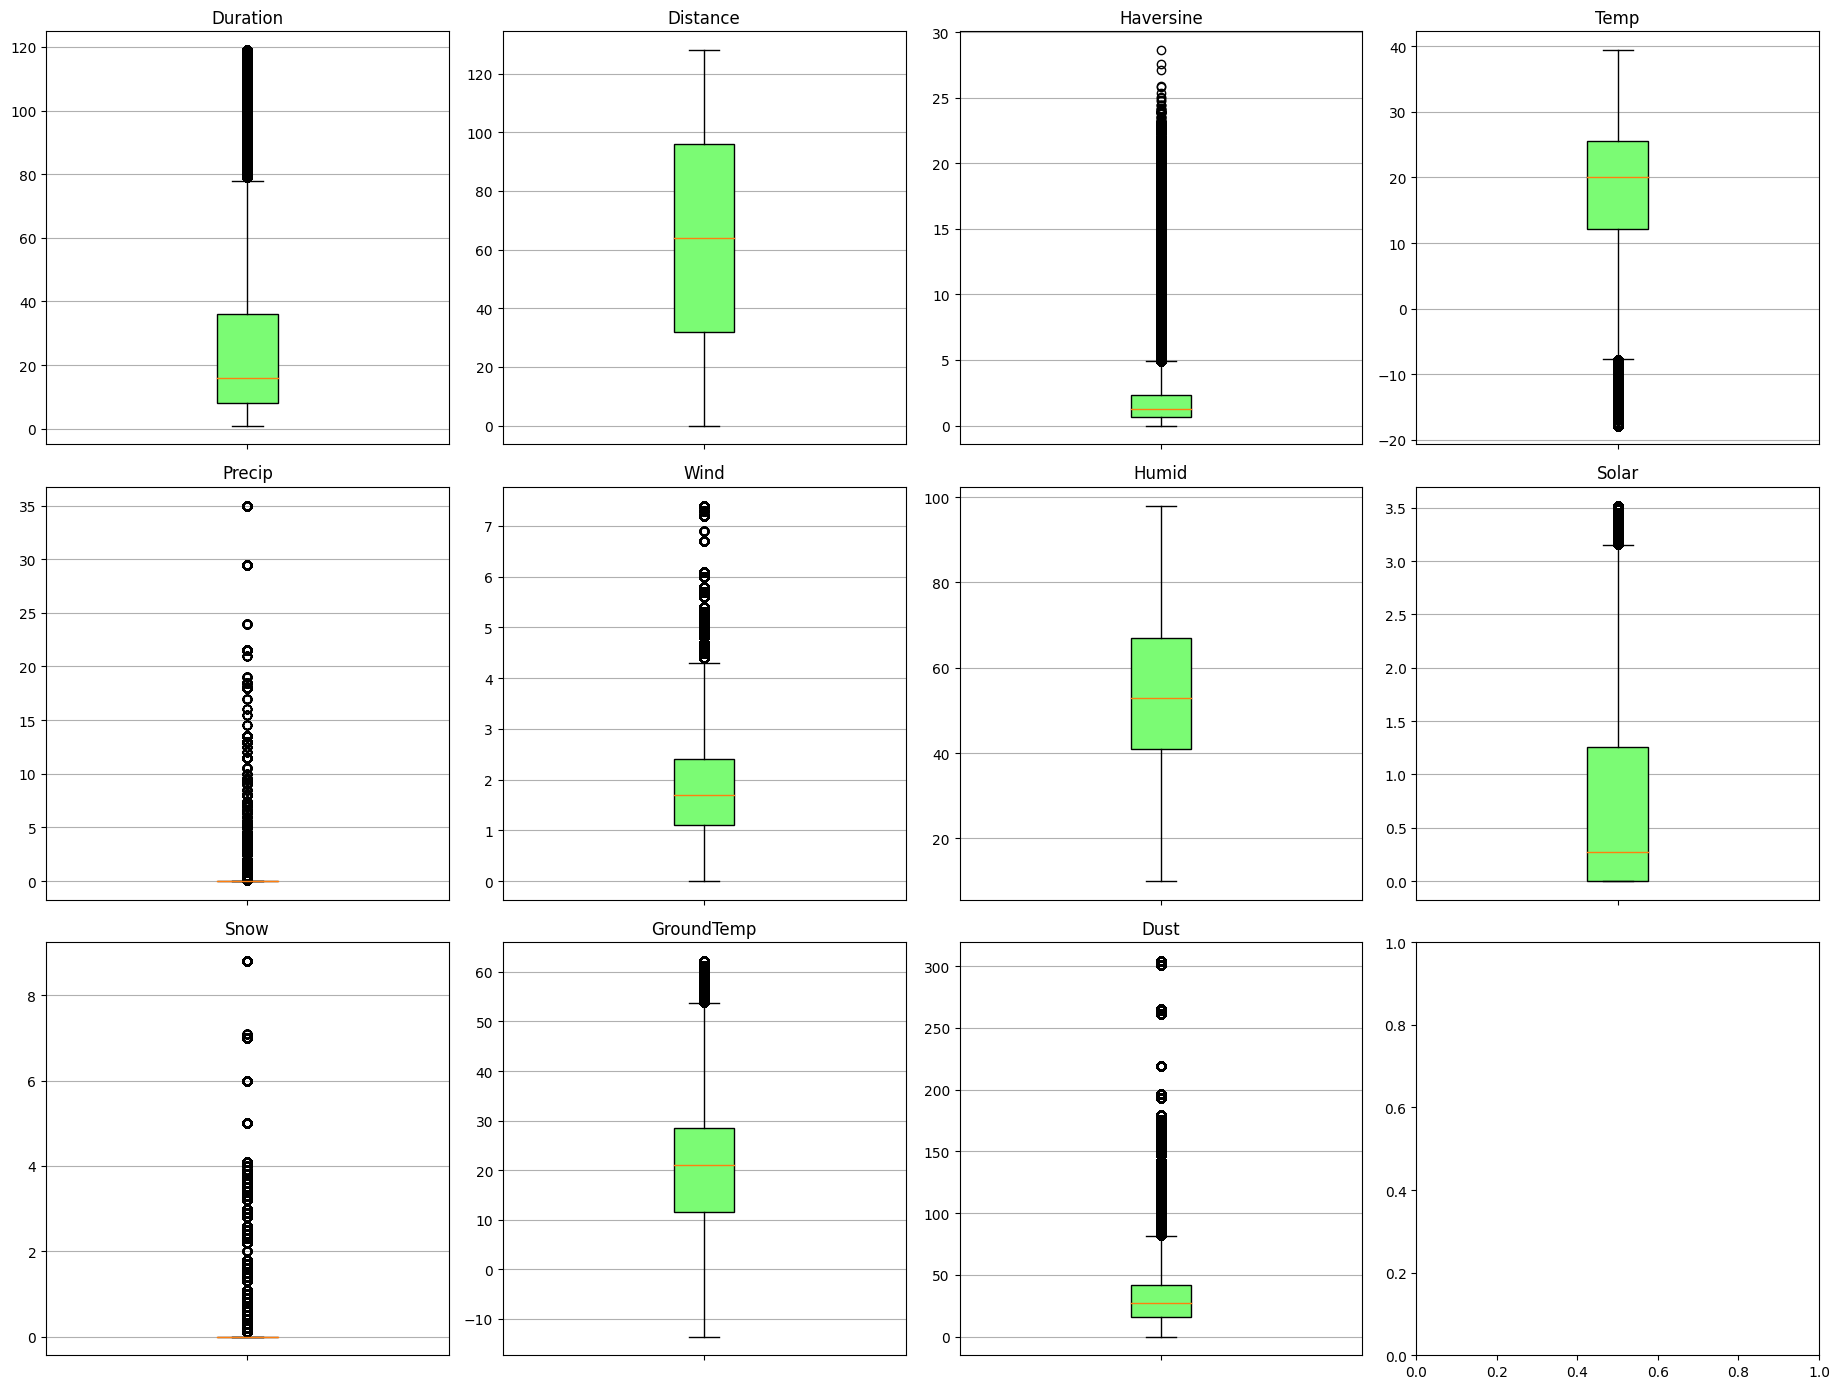

In [25]:
num_vars = ['Duration', 'Distance', 'Haversine','Temp','Precip', 'Wind', 'Humid', 'Solar', 'Snow','GroundTemp', 'Dust'] 

fig, axes = plt.subplots(nrows=3,ncols=4) # create figure and axes

axes = axes.flatten() # Flatten the axes array for easy iteration

for i,col in enumerate(num_vars):
    ax = axes[i]
    box = ax.boxplot(df[col], patch_artist=True)
    box['boxes'][0].set_facecolor('#7BFB74')
    ax.set_xticklabels([])
    ax.set_title(col)
    ax.yaxis.grid(True)

fig.set_size_inches(18.5,14)
plt.tight_layout()
plt.show()

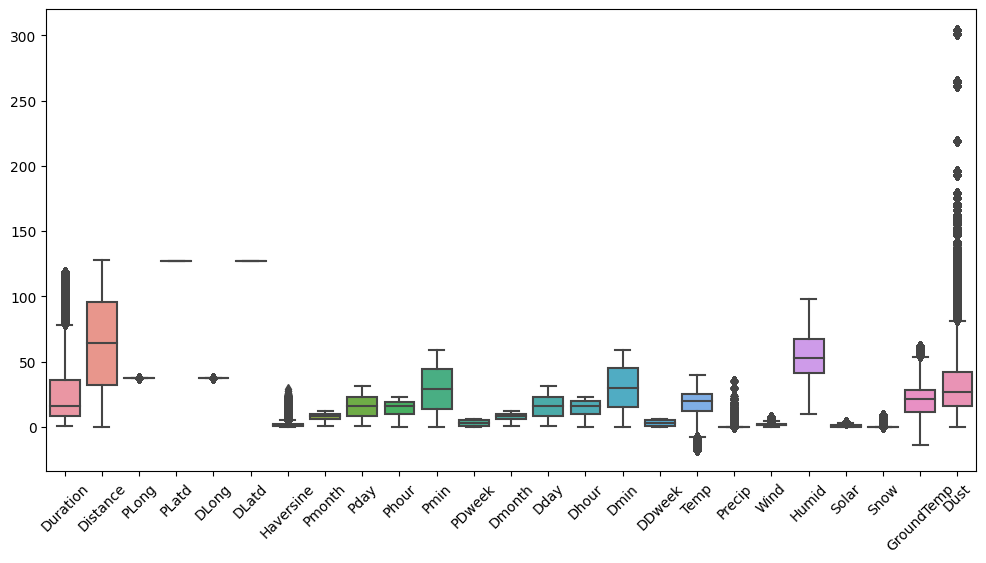

In [26]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(
    data=df.select_dtypes(include=[np.number]),
    ax=ax
)
plt.xticks(rotation=45)
plt.show()

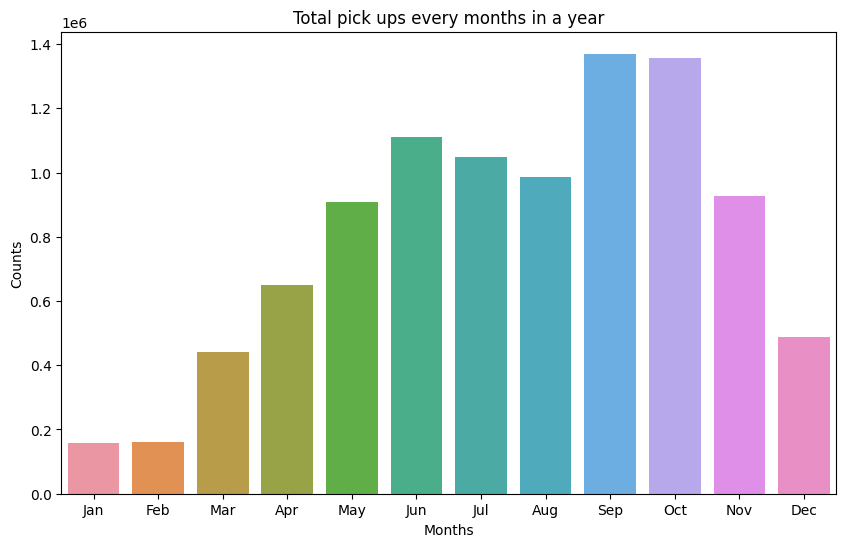

In [27]:
# Total pick ups every months in a year
pivot_table1 = df.pivot_table(index='Pmonth', aggfunc={'Pmonth': 'count'})

month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
pivot_table1.index = pivot_table1.index.map(month_map)


# Get the month names
#month_labels = [month_map[month] for month in df['Pmonth'].unique()]

# Get the pick-up months and trip counts
pick_up_months = pivot_table1.index.to_numpy()
trips_count = pivot_table1['Pmonth'].to_numpy()

plt.figure(figsize=(10,6))
sns.barplot(x=pick_up_months,y=trips_count)
plt.xlabel("Months")
plt.ylabel("Counts")
plt.title("Total pick ups every months in a year")
plt.show()

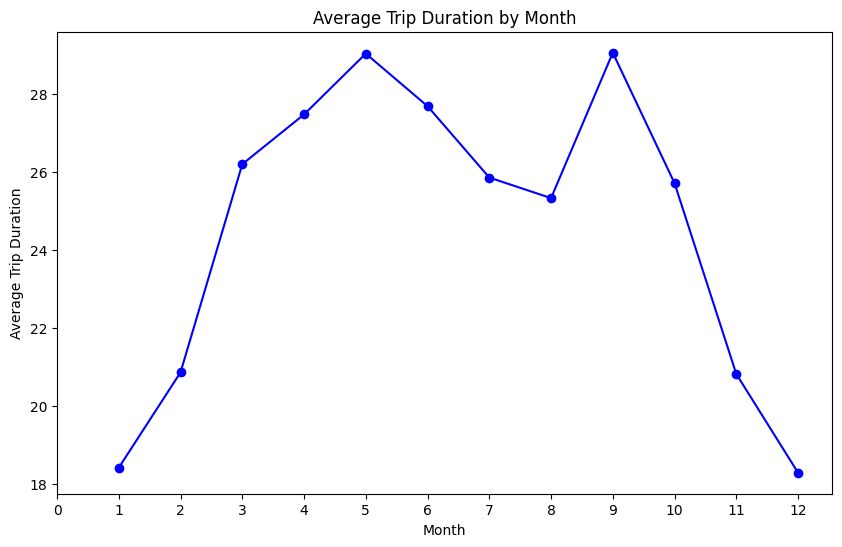

In [28]:
# Calculate average trip duration by month
df_avg_duration_by_month = df.groupby(['Pmonth'])['Duration'].mean()

# Plot average trip duration by month
plt.figure(figsize=(10, 6))
plt.plot(df_avg_duration_by_month.index, df_avg_duration_by_month.values,'b-o')
plt.xlabel('Month')
plt.xticks(range(len(df_avg_duration_by_month.index)+1))
plt.ylabel('Average Trip Duration')
plt.title('Average Trip Duration by Month')
plt.show()

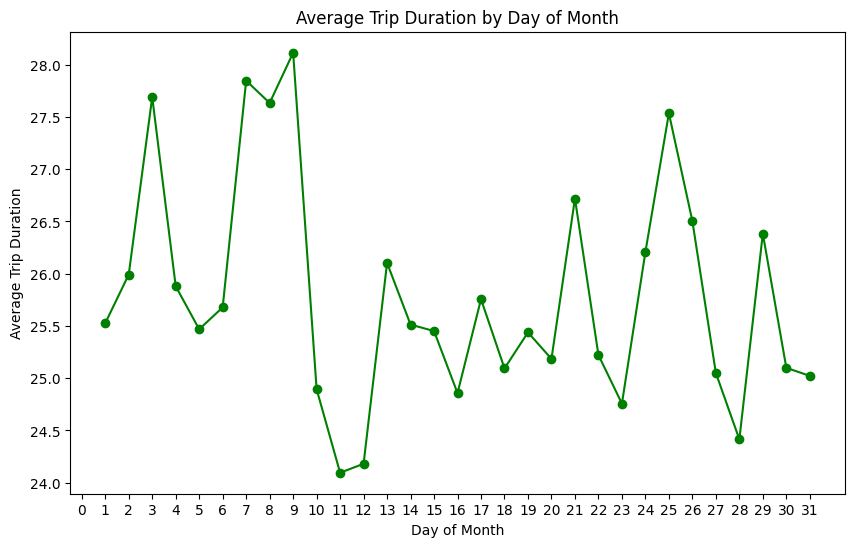

In [29]:
# Calculate average trip duration by day of the month
df_avg_duration_by_day_of_month = df.groupby(['Pday'])['Duration'].mean()

# Plot average trip duration by day of the month
plt.figure(figsize=(10, 6))
plt.plot(df_avg_duration_by_day_of_month.index, df_avg_duration_by_day_of_month.values,'g-o')
plt.xlabel('Day of Month')
plt.xticks(range(len(df_avg_duration_by_day_of_month.index)+1))
plt.ylabel('Average Trip Duration')
plt.title('Average Trip Duration by Day of Month')
plt.show()

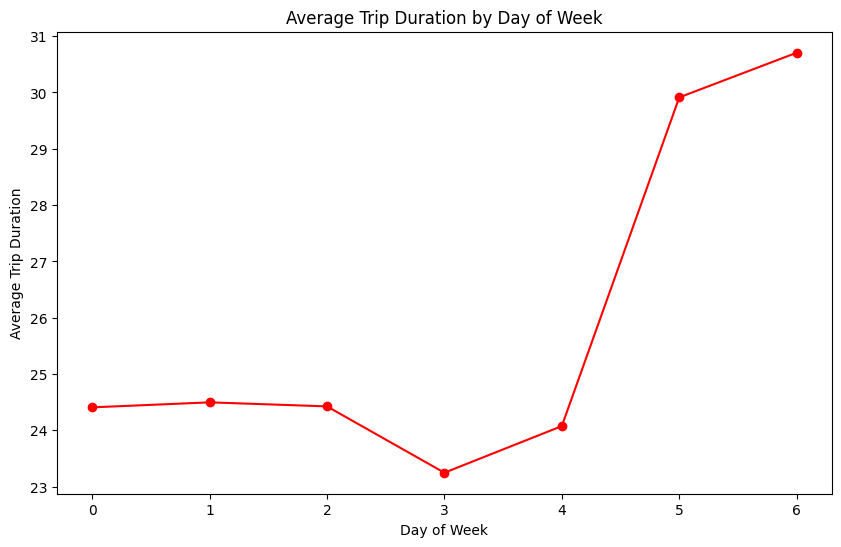

In [30]:
# Calculate average trip duration by day of the week
df_avg_duration_by_day_of_week = df.groupby(['PDweek'])['Duration'].mean()

# Plot average trip duration by day of the week
plt.figure(figsize=(10, 6))
plt.plot(df_avg_duration_by_day_of_week.index, df_avg_duration_by_day_of_week.values,'r-o')
plt.xlabel('Day of Week')
plt.xticks(range(len(df_avg_duration_by_day_of_week.index)))
plt.ylabel('Average Trip Duration')
plt.title('Average Trip Duration by Day of Week')
plt.show()

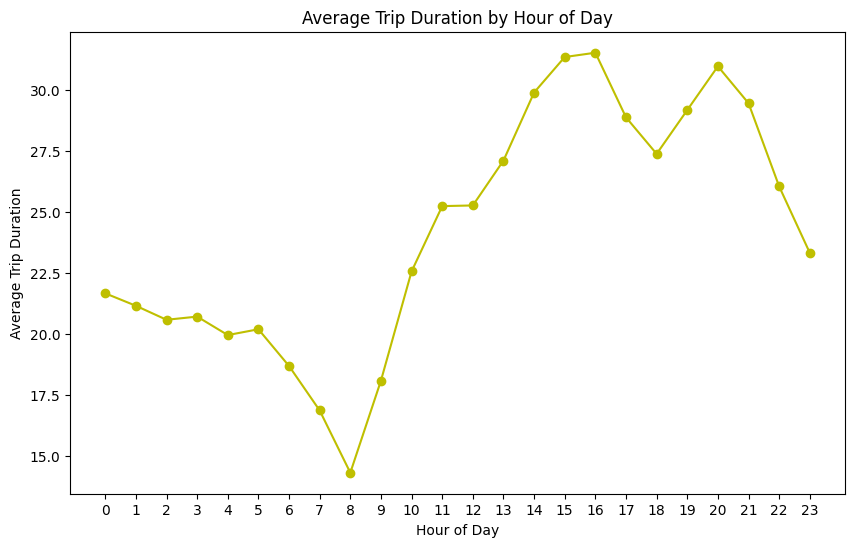

In [31]:
# Calculate average trip duration by hour of the day
df_avg_duration_by_hour_of_day = df.groupby(['Phour'])['Duration'].mean()

# Plot average trip duration by hour of the day
plt.figure(figsize=(10, 6))
plt.plot(df_avg_duration_by_hour_of_day.index, df_avg_duration_by_hour_of_day.values,'y-o')
plt.xlabel('Hour of Day')
plt.xticks(range(len(df_avg_duration_by_hour_of_day.index)))
plt.ylabel('Average Trip Duration')
plt.title('Average Trip Duration by Hour of Day')
plt.show()

**Observation:**
1. From Total pick ups and Average Trip Duration every months in a year plots
- The data shows a clear trend of increased pick-ups during the late summer and early fall months. The highest pick-ups occur in September and October, followed by June, July, and August.
- The total pick ups and average trip duration is low in months: noverber, december and january. Since, This is the period of time in which south korea experiences winter season.
- the data suggests that the average trip duration is highest in May and September.
- due to a combination of factors, including increased congestion, increased tourism, and favorable weather conditions.
2. From Average Trip Duration by Day of Week plot, We can observe that the trip duration is higer during weekends.
3. From Average Trip Duration by Hour of Day plot, The average trip duration is higer from 15th to 20th hour of a day. Typically after working hours or evening time.

__From the above observation we can say that temperature and time are influential factors for the estimation of the trip duration.__

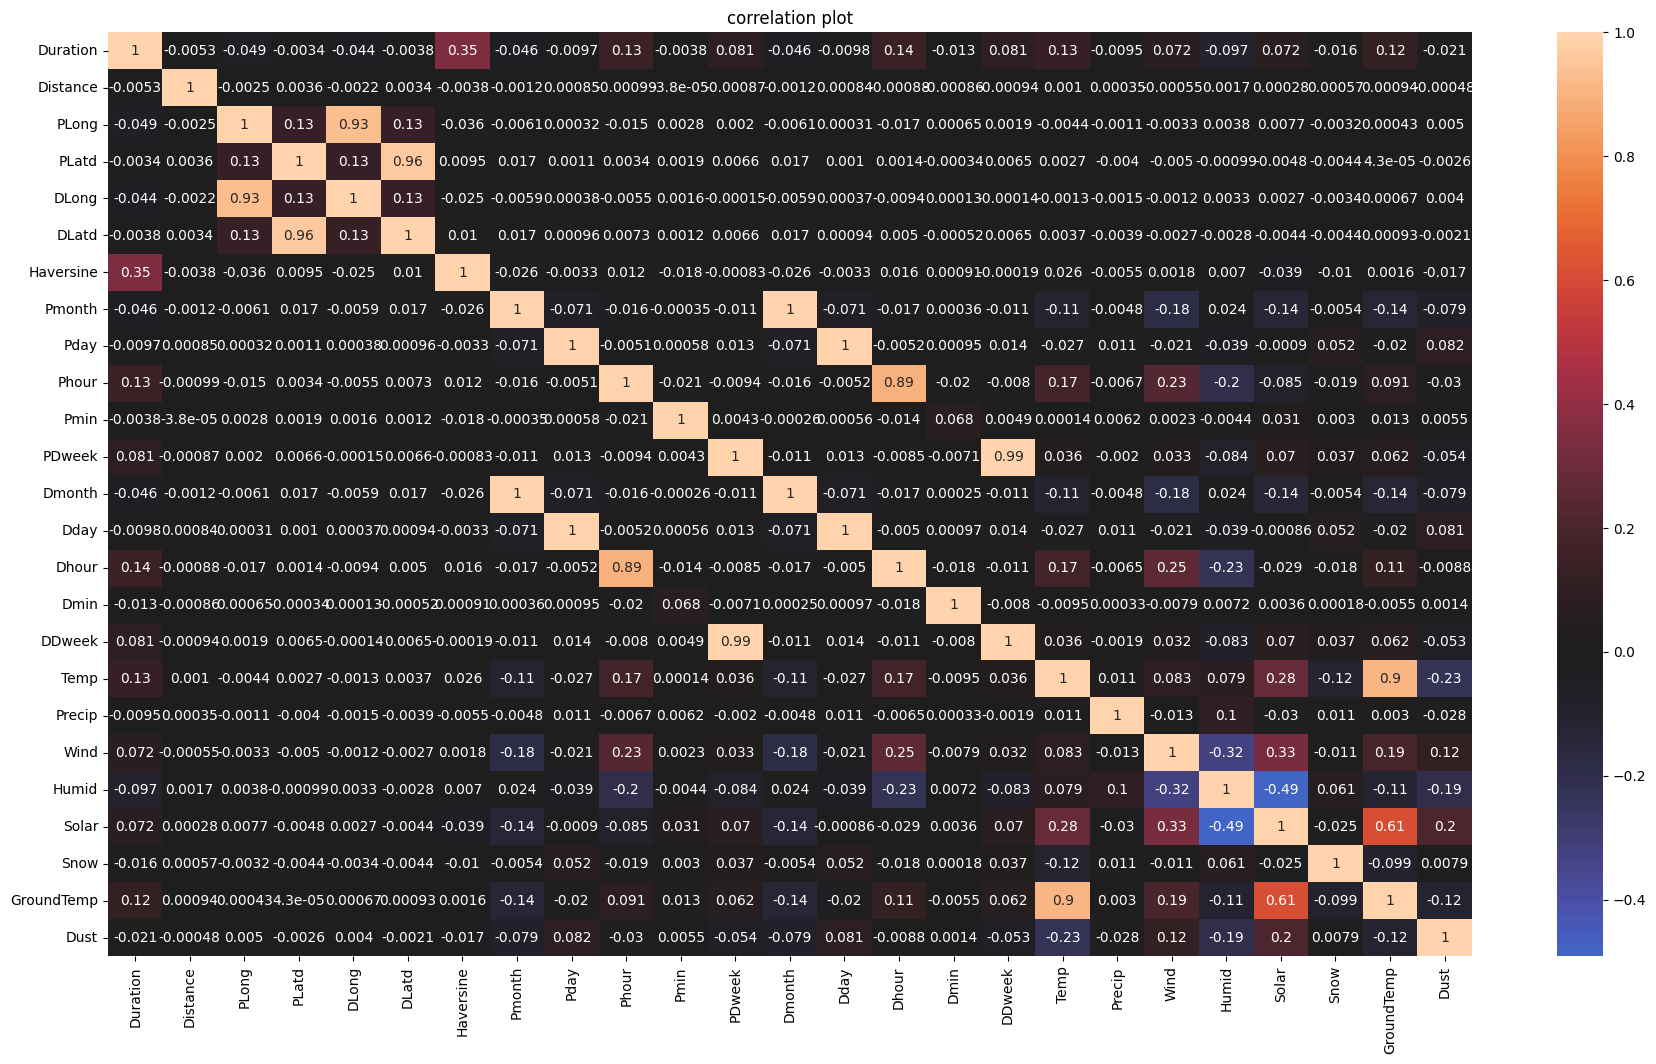

In [32]:
plt.figure(figsize = (22,12))
sns.heatmap(df.corr(),annot=True,center=0)
plt.title("correlation plot")
plt.show()

**Observations:**
- Plong and Dlong are highly correlated. but they represent the pick up and drop off longitudes.
- Platd and Dlatd are highly correlated. but they represent the pick up and drop off lattitudes.
- Temp and GroundTemp are highly correlated, and Temp has more correlation with Duration (target data) when compared with GroundTemp.

## **3. Data Preparation and Splitting**

In [33]:
df.columns

Index(['Duration', 'Distance', 'PLong', 'PLatd', 'DLong', 'DLatd', 'Haversine',
       'Pmonth', 'Pday', 'Phour', 'Pmin', 'PDweek', 'Dmonth', 'Dday', 'Dhour',
       'Dmin', 'DDweek', 'Temp', 'Precip', 'Wind', 'Humid', 'Solar', 'Snow',
       'GroundTemp', 'Dust'],
      dtype='object')

In [34]:
x = df.drop('Duration', axis=1)
y = df['Duration']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=40)

In [35]:
print("shape of X_train: ",X_train.shape)
print("shape of Y_train: ",y_train.shape)
print("shape of X_test: ",X_test.shape)
print("shape of Y_test: ",y_test.shape)

shape of X_train:  (7200843, 24)
shape of Y_train:  (7200843,)
shape of X_test:  (2400281, 24)
shape of Y_test:  (2400281,)


In [36]:
# function to produce evaluation metrics
def rmse(y_true, predictions):
    return mean_squared_error(y_true, predictions)**0.5

def get_metrics(y_true, predictions):
    print("="*50)
    print(f"MAE: {mean_absolute_error(y_true, predictions)}")
    print(f"MSE: {mean_squared_error(y_true, predictions)}")
    print(f"RMSE: {rmse(y_true, predictions)}")
    print(f"r2 Score: {r2_score(y_true, predictions)}")
    print("="*50)

In [37]:
# Scaling the data 
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)

## **4. Model Training and Evaluating**

In [38]:
lrm = LinearRegression()
lrm.fit(scaled_X_train, y_train)

LinearRegression()

In [39]:
lrm_preds = lrm.predict(X_test)
get_metrics(y_test, lrm_preds)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


MAE: 68.71229480884944
MSE: 6302.22309360859
RMSE: 79.38654227013915
r2 Score: -9.051007561531268
